<a href="https://colab.research.google.com/github/sukanyapanigrahi09/My-Python-Journey/blob/main/IBM_HR_Analytics_Employee_Attrition_%26_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
import os
import pandas as pd

file_csv_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
file_txt_path = './paste.txt'

# Load CSV
attr_df = pd.read_csv(file_csv_path, encoding='UTF-8-SIG')

# Try reading text file
paste_text = ""
if os.path.exists(file_txt_path):
    with open(file_txt_path, 'r', encoding='utf-8', errors='ignore') as f:
        paste_text = f.read()
else:
    print(f"Warning: Text file not found at {file_txt_path}")

# Show results
print('Loaded CSV shape:', attr_df.shape)
print('Loaded text length:', len(paste_text))
print('Head of HR Attrition data:')
print(attr_df.head())

# Clean column names
attr_df.columns = [c.strip() for c in attr_df.columns]

# Normalize Attrition
if 'Attrition' in attr_df.columns:
    attr_df['Attrition_Flag'] = attr_df['Attrition'].str.strip().str.lower().map({'yes': 1, 'no': 0})


Loaded CSV shape: (1470, 35)
Loaded text length: 0
Head of HR Attrition data:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7 

Dropped columns: ['EmployeeCount', 'StandardHours', 'Over18']
Missing values per column (top 10):
Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
dtype: int64
Target distribution (Attrition):
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition_Flag
0    0.839
1    0.161
Name: proportion, dtype: float64
Numeric summary:
                           count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeNumber     

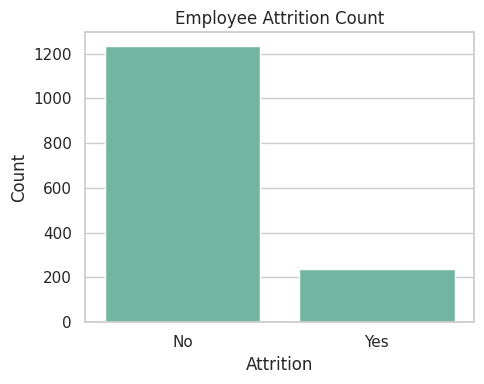

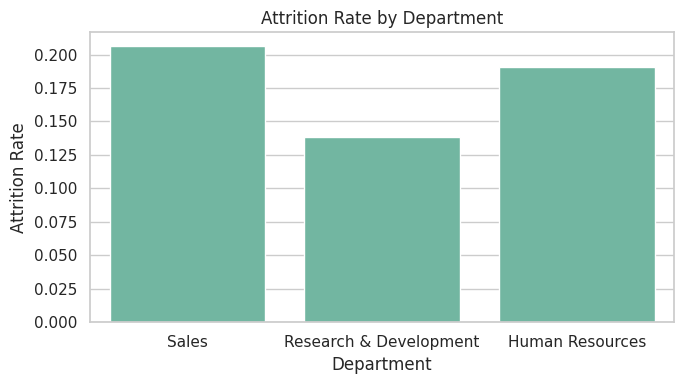

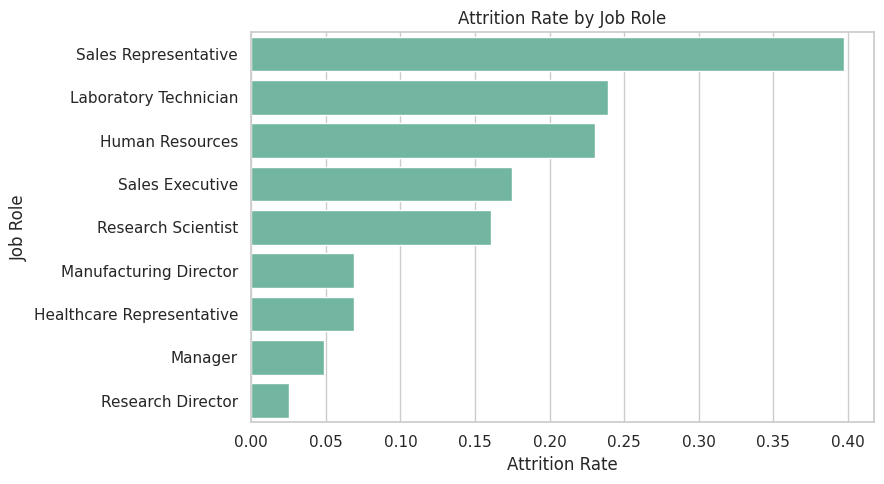

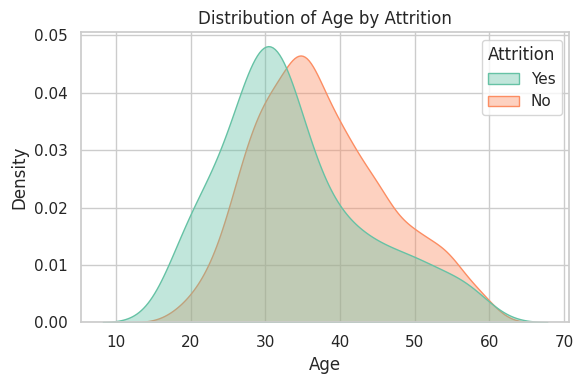

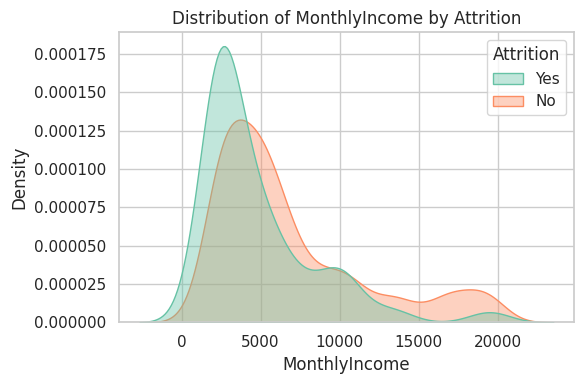

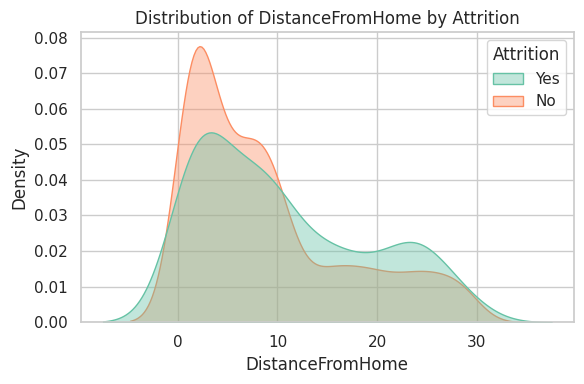

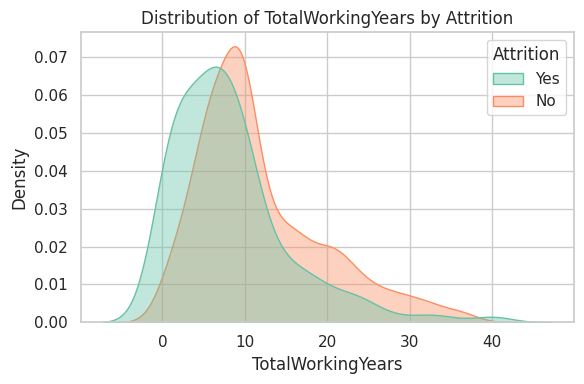

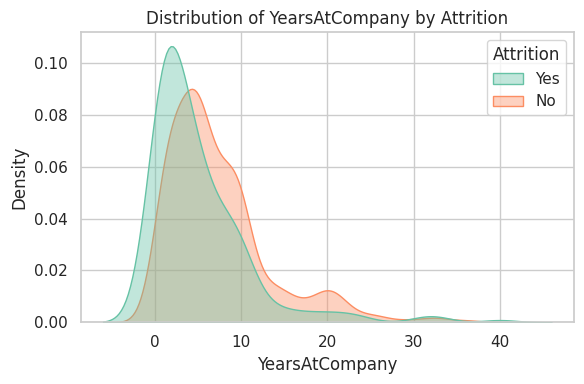

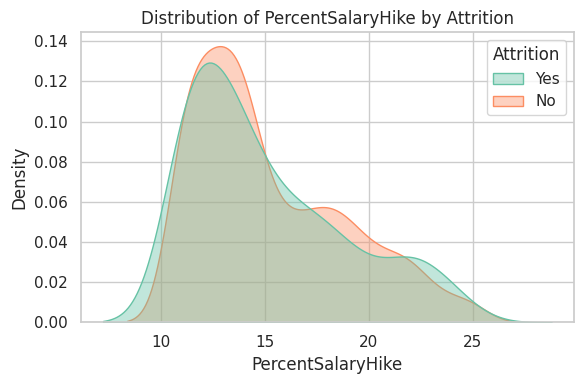

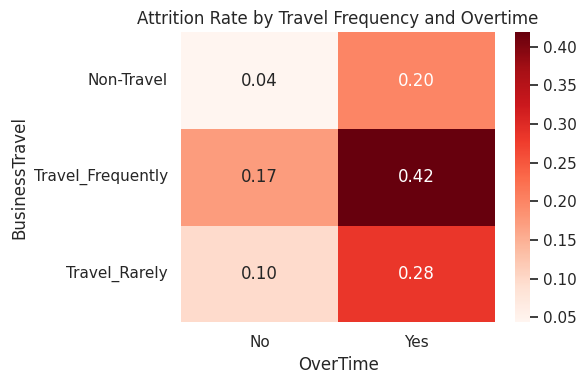

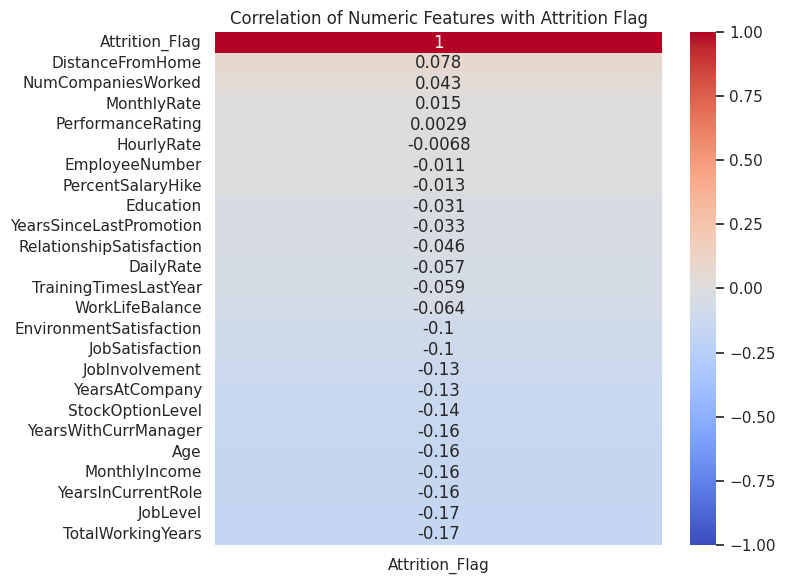

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression AUC: 0.783
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.83      0.25      0.39        59

    accuracy                           0.87       368
   macro avg       0.85      0.62      0.66       368
weighted avg       0.87      0.87      0.84       368

Top Positive Drivers:
                             feature      coef
50                      OverTime_Yes  0.403958
48              MaritalStatus_Single  0.265037
21           YearsSinceLastPromotion  0.223589
24  BusinessTravel_Travel_Frequently  0.188942
28                  Department_Sales  0.178004
11                NumCompaniesWorked  0.150691
39     JobRole_Laboratory Technician  0.136612
13                 PerformanceRating  0.121384
45      JobRole_Sales Representative  0.093826
31          EducationField_Marketing  0.090389
Top Negative Drivers:
                              feature      coef
47        

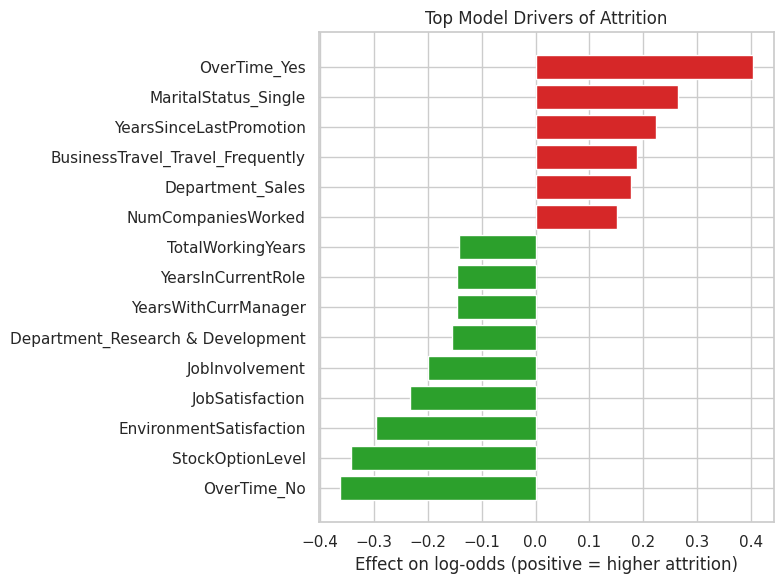

Key Group Attrition Rates: {'OverTime': {'No': 0.10436432637571158, 'Yes': 0.30528846153846156}, 'BusinessTravel': {'Travel_Frequently': 0.2490974729241877, 'Travel_Rarely': 0.14956855225311602, 'Non-Travel': 0.08}, 'MaritalStatus': {'Single': 0.2553191489361702, 'Married': 0.12481426448736999, 'Divorced': 0.10091743119266056}, 'JobSatisfaction': {1: 0.22837370242214533, 2: 0.16428571428571428, 3: 0.16515837104072398, 4: 0.11328976034858387}, 'EnvironmentSatisfaction': {1: 0.2535211267605634, 2: 0.14982578397212543, 3: 0.1368653421633554, 4: 0.13452914798206278}}


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
file_csv_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
attr_df = pd.read_csv(file_csv_path, encoding='UTF-8-SIG')

# Strip column names
attr_df.columns = [c.strip() for c in attr_df.columns]

# Normalize Attrition flag
if 'Attrition' in attr_df.columns:
    attr_df['Attrition_Flag'] = attr_df['Attrition'].str.strip().str.lower().map({'yes': 1, 'no': 0})

# Coerce numeric columns where possible
for col in attr_df.columns:
    if attr_df[col].dtype == 'object' and col not in [
        'Attrition', 'BusinessTravel', 'Department', 'EducationField',
        'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'
    ]:
        attr_df[col] = pd.to_numeric(attr_df[col], errors='coerce')

# Drop constant columns
cols_to_drop = [c for c in ['EmployeeCount', 'StandardHours', 'Over18'] if c in attr_df.columns]
attr_df_clean = attr_df.drop(columns=cols_to_drop)
print('Dropped columns:', cols_to_drop)

# Missing values check
missing_series = attr_df_clean.isna().sum().sort_values(ascending=False)
print('Missing values per column (top 10):')
print(missing_series.head(10))

# Target distribution
print('Target distribution (Attrition):')
if 'Attrition' in attr_df_clean.columns:
    print(attr_df_clean['Attrition'].value_counts())
if 'Attrition_Flag' in attr_df_clean.columns:
    print(attr_df_clean['Attrition_Flag'].value_counts(normalize=True).round(3))

# Numeric summary
print('Numeric summary:')
print(attr_df_clean.select_dtypes(include=[np.number]).describe().T)

# === Visualizations ===
sns.set(style='whitegrid', palette='Set2')

# Attrition count
plt.figure(figsize=(5, 4))
sns.countplot(data=attr_df_clean, x='Attrition', order=['No', 'Yes'])
plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Attrition rate by Department
if 'Department' in attr_df_clean.columns:
    plt.figure(figsize=(7, 4))
    sns.barplot(data=attr_df_clean, x='Department', y='Attrition_Flag', estimator=np.mean, errorbar=None)
    plt.title('Attrition Rate by Department')
    plt.xlabel('Department')
    plt.ylabel('Attrition Rate')
    plt.tight_layout()
    plt.show()

# Attrition rate by JobRole
if 'JobRole' in attr_df_clean.columns:
    role_rate = attr_df_clean.groupby('JobRole')['Attrition_Flag'].mean().sort_values(ascending=False)
    plt.figure(figsize=(9, 5))
    sns.barplot(x=role_rate.values, y=role_rate.index, orient='h')
    plt.title('Attrition Rate by Job Role')
    plt.xlabel('Attrition Rate')
    plt.ylabel('Job Role')
    plt.tight_layout()
    plt.show()

# Numeric distributions
numeric_cols = [c for c in attr_df_clean.select_dtypes(include=[np.number]).columns if c != 'EmployeeNumber']
key_numeric = [
    c for c in [
        'Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany',
        'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
        'YearsWithCurrManager', 'JobLevel', 'DailyRate', 'HourlyRate', 'MonthlyRate'
    ] if c in numeric_cols
]

for col in key_numeric[:6]:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=attr_df_clean, x=col, hue='Attrition', common_norm=False, fill=True, alpha=0.4)
    plt.title(f'Distribution of {col} by Attrition')
    plt.tight_layout()
    plt.show()

# Categorical heatmap
cat_a = 'BusinessTravel' if 'BusinessTravel' in attr_df_clean.columns else None
cat_b = 'OverTime' if 'OverTime' in attr_df_clean.columns else None
if cat_a and cat_b:
    pivot_rate = attr_df_clean.pivot_table(index=cat_a, columns=cat_b, values='Attrition_Flag', aggfunc='mean')
    plt.figure(figsize=(6, 4))
    sns.heatmap(pivot_rate, annot=True, cmap='Reds', fmt='.2f')
    plt.title('Attrition Rate by Travel Frequency and Overtime')
    plt.xlabel('OverTime')
    plt.ylabel('BusinessTravel')
    plt.tight_layout()
    plt.show()

# Correlation heatmap
corr = attr_df_clean.select_dtypes(include=[np.number]).corr()
if 'Attrition_Flag' in corr.columns:
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr[['Attrition_Flag']].sort_values(by='Attrition_Flag', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation of Numeric Features with Attrition Flag')
    plt.tight_layout()
    plt.show()

# === Simple Logistic Regression Model ===
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

features = [c for c in attr_df_clean.columns if c not in ['Attrition', 'Attrition_Flag', 'EmployeeNumber']]
X = attr_df_clean[features]
y = attr_df_clean['Attrition_Flag']

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
clf = Pipeline(steps=[('preprocess', preprocess), ('model', log_reg)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
clf.fit(X_train, y_train)

y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print('Logistic Regression AUC:', round(auc, 3))
print('Classification Report:')
print(classification_report(y_test, (y_pred_proba >= 0.5).astype(int)))

# Feature importance
oh = clf.named_steps['preprocess'].named_transformers_['cat']
cat_feature_names = oh.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_feature_names)
coefs = clf.named_steps['model'].coef_.ravel()
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs}).sort_values('coef', ascending=False)

print('Top Positive Drivers:')
print(coef_df.head(10))
print('Top Negative Drivers:')
print(coef_df.tail(10))

# Plot top drivers
coef_df['abs_coef'] = coef_df['coef'].abs()
TopN = 15
top_abs = coef_df.sort_values('abs_coef', ascending=False).head(TopN).sort_values('coef')
plt.figure(figsize=(8, 6))
colors = ['#2ca02c' if v < 0 else '#d62728' for v in top_abs['coef']]
plt.barh(top_abs['feature'], top_abs['coef'], color=colors)
plt.title('Top Model Drivers of Attrition')
plt.xlabel('Effect on log-odds (positive = higher attrition)')
plt.tight_layout()
plt.show()

# Insights
insights = {}
if 'OverTime' in attr_df_clean.columns:
    insights['OverTime'] = attr_df_clean.groupby('OverTime')['Attrition_Flag'].mean().to_dict()
if 'BusinessTravel' in attr_df_clean.columns:
    insights['BusinessTravel'] = attr_df_clean.groupby('BusinessTravel')['Attrition_Flag'].mean().sort_values(ascending=False).to_dict()
if 'MaritalStatus' in attr_df_clean.columns:
    insights['MaritalStatus'] = attr_df_clean.groupby('MaritalStatus')['Attrition_Flag'].mean().sort_values(ascending=False).to_dict()
if 'JobSatisfaction' in attr_df_clean.columns:
    insights['JobSatisfaction'] = attr_df_clean.groupby('JobSatisfaction')['Attrition_Flag'].mean().to_dict()
if 'EnvironmentSatisfaction' in attr_df_clean.columns:
    insights['EnvironmentSatisfaction'] = attr_df_clean.groupby('EnvironmentSatisfaction')['Attrition_Flag'].mean().to_dict()

print('Key Group Attrition Rates:', insights)
